In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Estimating nitrate concentrations from BGC Argo float data using a model based on the JMA repeat hydrography data.

For this assignment, use your model to estimate nitrate from the BGC Argo profiles found in
the ‘kuro_BGCArgo_noNO3.csv’ file. I have also provided you with the full BGC Argo dataset
in ‘kuro_BGCArgo_NO3.csv’ so that you can assess your model performance.

# 1.1 Before you apply your model, assess the level of overlap between the range of environmental conditions represented in the JMA and BGC Argo data sets. 

In [105]:
#import JMA data
infile='C:/Users/a_mac/Box Sync/1 ODU semestres/8 spring 2020/classes/Sophies Advanced data science techniques/problem_set_3/jma_nitrate.csv'
data=pd.read_csv(infile)
#data

In [107]:
#import BCGargo data
infile_Kuro_noNO3='C:/Users/a_mac/Box Sync/1 ODU semestres/8 spring 2020/classes/Sophies Advanced data science techniques/problem_set_3/kuro_BGCargo_noNO3.csv'
data_Kuro_noNO3=pd.read_csv(infile_Kuro_noNO3)
#data_Kuro_noNO3

# 1.2 Compare the geographical extent, depth range, water masses, seasonal coverage and any other factors that you think could be pertinent between the two data sets.

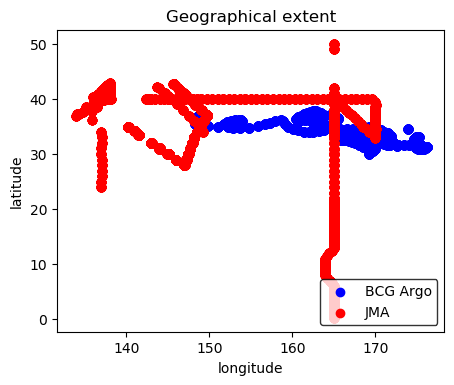

In [108]:
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)
plt.scatter(data_Kuro_noNO3[["LON"]],data_Kuro_noNO3[["LAT"]],color='blue')
plt.scatter(data.lon,data.lat, color='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Geographical extent')
ax.legend(('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower right')

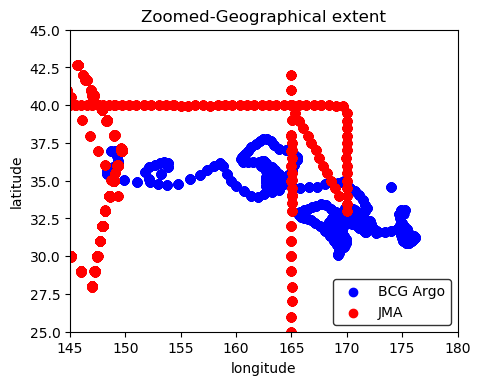

In [110]:
fig, (ax) =  plt.subplots(1, 1, figsize = (5, 4), dpi = 100)
plt.scatter(data_Kuro_noNO3[["LON"]],data_Kuro_noNO3[["LAT"]],color='blue')
plt.scatter(data.lon,data.lat, color='red')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Zoomed-Geographical extent')
plt.ylim((25,45))
plt.xlim((145,180))
ax.legend(('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower right')

Text(0.5, 1.0, 'Water masses')

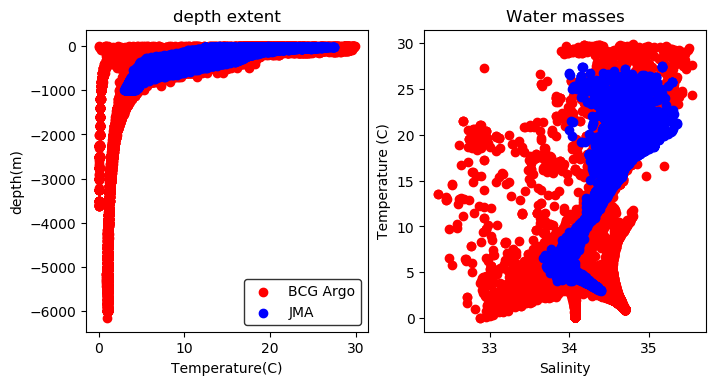

In [111]:
fig, (ax, ax2) =  plt.subplots(1, 2, figsize = (8, 4), dpi = 100)
ax.scatter(data.theta,-data.depth,color='red')
ax.scatter(data_Kuro_noNO3[["TEMPERATURE[C]"]],data_Kuro_noNO3[["DEPTH[M]"]],color='blue')
ax.legend(('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'lower right')
ax.set_xlabel('Temperature(C)')
ax.set_ylabel('depth(m)')
ax.set_title('depth extent')

ax2.scatter(data.sal,data.theta,color='red')
ax2.scatter(data_Kuro_noNO3[["SALINITY[PSS]"]],data_Kuro_noNO3[["TEMPERATURE[C]"]],color='blue')
ax2.set_xlabel('Salinity')
ax2.set_ylabel('Temperature (C)')
ax2.set_title('Water masses')

(2010.75, 2017.25)

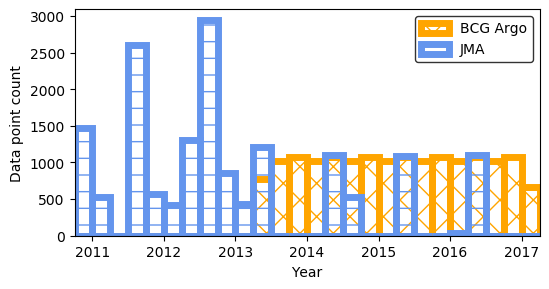

In [112]:
#sampling-date (seasonal) analysis. 
#The code for this is from the work of Corday and Austin!!

fig, (ax) =  plt.subplots(1, 1, figsize = (6, 3), dpi = 100)

jma_dayssince = ((data.year - 1900)*364.75) + (data.month*(364.75/12)) + data.day

bins = np.arange(2010,2018,0.25)

plt.hist(1900+data_Kuro_noNO3['Days since 1/1/1900']/364.75, edgecolor = "orange", lw = 5, facecolor = "None", bins = bins, hatch = 'X')
plt.hist(1900+jma_dayssince/364.75, edgecolor = "cornflowerblue", facecolor = "None", lw = 5, bins = bins, hatch = '-')

ax.set_xlabel('Year')
ax.set_ylabel('Data point count')
ax.legend(('BCG Argo', 'JMA'), edgecolor = 'k', loc = 'upper right')
ax.set_xticks(np.arange(2010,2019,1))
ax.set_xlim([2010.75,2017.25])

# 1.3 Describe similarities and highlight differences.

Just from the geographic extend, we can see that the distribution of JMA samples is considerably higher than that of BCG ARGO samples. However big this despair, for this and other variables, there is some overlap in the sampled region, depths, and seasons. 
The geographical extent overlaps in the region between the ~30 to ~40° of latitude and ~150 to ~175° of longitude. The density of sampling points is higher in that region for BCG Argo.
BCG samples range from the surface to 6,000m depth, but JMA samples go only to 1,000m. Therefore, this should be another major consideration during the building and testing of the model.
Given the regions and depth in which samples were collected, it was to be expected that water masses will be different. Although isopycnals are not shown, it is clear from the plot that different water masses have been sampling in either of the campaigns (with some overlap).
Most of the JMA samples were collected from 2011 to 2013, with fewer samples collected until 2017. In the other hand, BCG sampling focusses on that last period of time.

# 2.1 BUILD your model to the BGC Argo data to estimate nitrate concentrations based on your input variables (e.g. temperature, salinity, etc…).

In [113]:
# change here the limits (LAT/LON) for the region you want to work with
longitude_lower_lim=168
longitude_upper_lim=172
latitude_lower_lim=30
latitude_upper_lim=41

In [114]:
# create filter(s) to saparate samples from more localized Lat/Long regions
cruise=data[(data.lon>longitude_lower_lim)&(data.lon<longitude_upper_lim)&(data.lat>latitude_lower_lim)&(data.lat<latitude_upper_lim)]
#cruise

In [115]:
# associate spatial and nitrate filters
filter_NO3_cruise = cruise[cruise.nitrate>0]

Text(0.5, 1.0, 'Nitrate concentration profile')

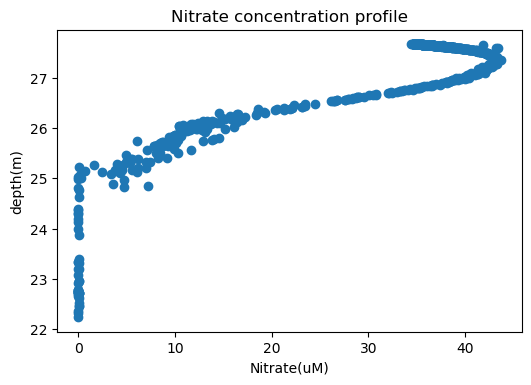

In [116]:
# plot the new NO3 profile for the given region
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(filter_NO3_cruise.nitrate,filter_NO3_cruise.density)
ax.set_xlabel('Nitrate(uM)')
ax.set_ylabel('depth(m)')
ax.set_title('Nitrate concentration profile')

Build a model using KNN

In [117]:
#define the sets of data to be used
X=filter_NO3_cruise[["sal","theta"]]
y=filter_NO3_cruise[["nitrate"]]

In [118]:
#print the shape of the sets of data to corroborate that they will be useful while building the model
print(np.shape(X))
print(np.shape(y))

(755, 2)
(755, 1)


In [119]:
# Split the data into training/testing sets
# 1) import the fuction
from sklearn.model_selection import train_test_split

In [120]:
# 2) use the fuction 'train_test_split' to define the train and test datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [121]:
print(np.shape(X_train))
print(np.shape(y_train))

(604, 2)
(604, 1)


Test the accuracy of models with different values of 'k'

In [122]:
# pick model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
    
results = []
for n in range(1,20,1):
    res = []
    model = KNeighborsRegressor(n_neighbors=n)
    model.fit(X_train, y_train)
    print ('Neighbors = %s\n' % (int(n)))
    # compute the R^2 score
    accuracyscore = model.score(X_train,y_train)
    print("Training R^2 score: {0:.2f}\n".format(model.score(X_train,y_train)))
    # plot the model together with the data
    xfit = X_test
    yfit = model.predict(xfit)
    print("Testing R^2 score: {0:.2f}\n".format(model.score(xfit,yfit)))
    rmse = sqrt(mean_squared_error(y_test, yfit))
    print("RMSE = %s \n" % (rmse))
    res = [n,accuracyscore,rmse]
    results.append(res)

Neighbors = 1

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 1.124828463743553 

Neighbors = 2

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.929002972642611 

Neighbors = 3

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.9429649668062904 

Neighbors = 4

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.8916027266588133 

Neighbors = 5

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.8294977336112653 

Neighbors = 6

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.8310391156698723 

Neighbors = 7

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.7918225199468708 

Neighbors = 8

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.745891360569033 

Neighbors = 9

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.774016449110999 

Neighbors = 10

Training R^2 score: 1.00

Testing R^2 score: 1.00

RMSE = 0.7847958438704243 

Neighbors = 11

Training R^2 score: 1.00

Testing R^2 score: 1.

In [123]:
myarray = np.asarray(results)

#make a dataframe with each column named for ploting
KNN_test_data = pd.DataFrame({'Kneighbors': myarray[:,0], 'AccScore': myarray[:,1], 'RMSE': myarray[:,2]})
KNN_test_data

,Kneighbors,AccScore,RMSE
0,1.0,0.999999,1.124828
1,2.0,0.997822,0.929003
2,3.0,0.996948,0.942965
3,4.0,0.996760,0.891603
4,5.0,0.996550,0.829498
5,6.0,0.996353,0.831039
6,7.0,0.996248,0.791823
7,8.0,0.996193,0.745891
8,9.0,0.996074,0.774016
9,10.0,0.995952,0.784796


Text(0.5, 1.0, 'model performance depending on k-number')

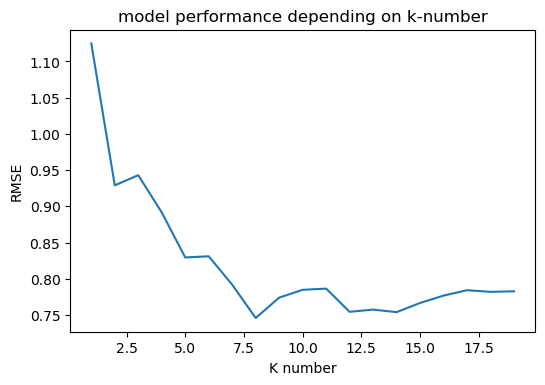

In [124]:
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.plot(myarray[:,0],myarray[:,2])
plt.xlabel('K number')
plt.ylabel('RMSE')
ax.set_title('model performance depending on k-number')

Build a model based on the above analysis (effect of k number)

Choose a number for k: 10
Training R^2 score: 1.00
Testing R^2 score: 1.00


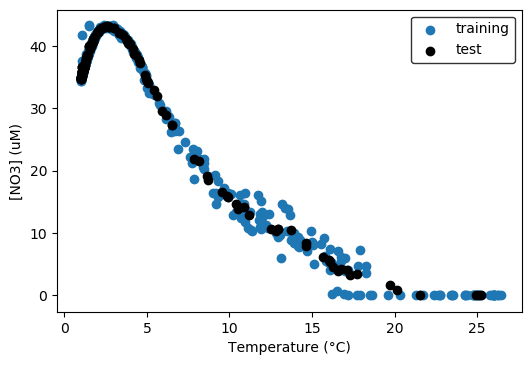

In [131]:
# use the script below to build the model based on KNN. 
# you will have to choose a number for 'k'.

n  = int(input('Choose a number for k: '))

# pick model
model = KNeighborsRegressor(n_neighbors=n)
model.fit(X_train, y_train)

# compute the R^2 score
print("Training R^2 score: {0:.2f}".format(model.score(X_train,y_train)))

# plot the model together with the data
xfit = X_test
yfit = model.predict(xfit)
print("Testing R^2 score: {0:.2f}".format(model.score(xfit,yfit)))

#plt.scatter(X_train[["sal"]],y_train)
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_train[["theta"]],y_train)
plt.scatter(xfit[["theta"]], yfit,c = 'k')
plt.xlabel('Temperature (°C)')
plt.ylabel('[NO3] (uM)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'upper right')

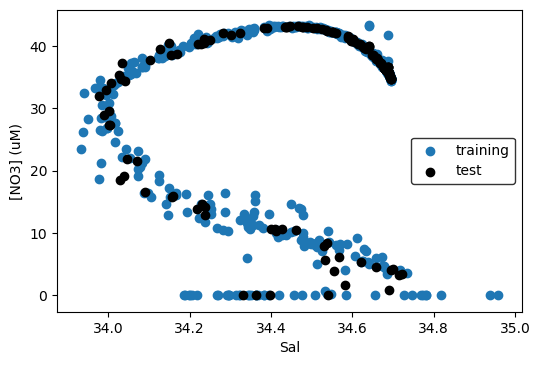

In [135]:
# plot the nitrate predictions vs the other test variable (i.e. salinity)
# and plot the train data to compare with the model

fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_train[["sal"]],y_train)
plt.scatter(xfit[["sal"]], yfit,c = 'k')
plt.xlabel('Sal')
plt.ylabel('[NO3] (uM)')
ax.legend(('training', 'test'), edgecolor = 'k', loc = 'center right')

# 2.2 APPLY your model to the BGC Argo data to estimate nitrate concentrations based on your input variables (e.g. temperature, salinity, etc…).

In [137]:
# create filter(s) to saparate samples from more localized Lat/Long regions
Kuro_noNO3_cruise=data_Kuro_noNO3[(data_Kuro_noNO3.LON>longitude_lower_lim)&(data_Kuro_noNO3.LON<longitude_upper_lim)&(data_Kuro_noNO3.LAT>latitude_lower_lim)&(data_Kuro_noNO3.LAT<latitude_upper_lim)]
#Kuro_noNO3_cruise

In [138]:
# Make your predictions using a KNN model based on salinity and temperature
xkuro = Kuro_noNO3_cruise[["SALINITY[PSS]","TEMPERATURE[C]"]]
predictionsNO3=model.predict(xkuro)
print(np.shape(predictionsNO3))

(6420, 1)


In [139]:
#import the data that contains the actual NO3 values to compare with your predictions
infile_Kuro_NO3='C:/Users/a_mac/Box Sync/1 ODU semestres/8 spring 2020/classes/Sophies Advanced data science techniques/problem_set_3/kuro_BGCargo_NO3.csv'
data_Kuro_NO3=pd.read_csv(infile_Kuro_NO3)
#data_Kuro_NO3

In [140]:
# create filter(s) to saparate samples from more localized Lat/Long regions
Kuro_NO3_cruise=data_Kuro_NO3[(data_Kuro_NO3.LON>longitude_lower_lim)&(data_Kuro_NO3.LON<longitude_upper_lim)&(data_Kuro_NO3.LAT>latitude_lower_lim)&(data_Kuro_NO3.LAT<latitude_upper_lim)]
#Kuro_NO3_cruise

In [141]:
#create variables that contain the predicted and real nitrate values
realNO3=Kuro_NO3_cruise[["NITRATE[uMOL/KG]"]]
X=predictionsNO3
y=realNO3

# 3.1 Compare the observed BGC Argo nitrate to your predicted values. Report the r 2 score and RMSE (root mean squared error).

In [142]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Coefficients: 
 [[1.10396341]]
Mean squared error: 4.75
Coefficient of determination: 0.97


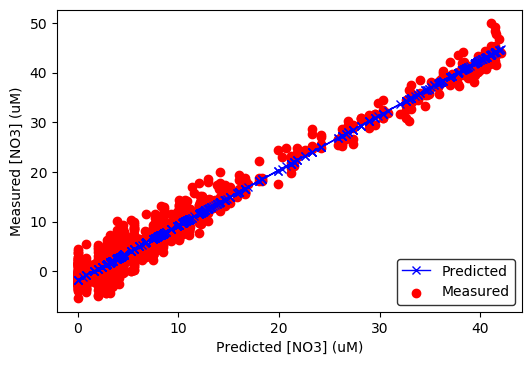

In [145]:
# Split the data into training/testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
fig, (ax) =  plt.subplots(1, 1, dpi = 100)
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred,  '-x', color='blue', linewidth=1)
plt.xlabel('Predicted [NO3] (uM)')
plt.ylabel('Measured [NO3] (uM)')
ax.legend(('Predicted', 'Measured'), edgecolor = 'k', loc = 'lower right')

plt.show()

In [82]:
# repeat the steps above using different latitudes and longitudes

# 3.2 Does your model perform consistently well, or are there any noticeable outliers? If there are, identify those data points and suggest reasons why you think that your model performs less well for those points.

The fit of the predicted vs the measured values is better when applying filters to better match the data (i.e. depth, season, geography, etc.). There are still measured values that departure considerably from the predicted line. This is more obvious in the lower end of the nitrate concentrations. These values are commonly associated to the upper layers, where nutrient uptakes occur. 

The dynamics of the ocean surface are variable depending not only on temperature and salinity, but in a set of variables with keeps growing with continuous research (i.e. mixotrophy, light attenuation, phytoplankton diversity, food chain interactions, availability of micro and macro nutrients, etc.). A more complex model that evaluates and adds the relevance of more nitrate controlling variables should be considered for further research/problem sets.